## TASK 3 - **Exploratory Data Analysis - Retail**
### Author - Varanasi Sreekanth
### GRIP @ The Sparks Foundation
### gripjanuary23

#### Problem Statement - In this task we will try to find out the weak areas where we can work to make more profit.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
df.shape

(9994, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [24]:
df.duplicated().sum()

17

#### *We have 17 duplicate values so we have to drop them*

In [25]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [27]:
df.shape

(9994, 13)

In [28]:
#Checking for unique values in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [30]:
#Country is United State so we can drop that column as entire data is same.
df= df.drop(columns="Country")

In [31]:
#Drop postal code as it shows about in which state or city the data is given.
df = df.drop(columns="Postal Code")

In [33]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

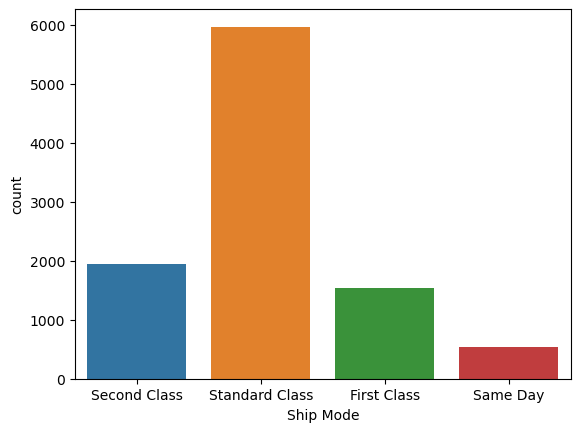

In [34]:
#Univariate analysis
sns.countplot(x='Ship Mode',data=df)
plt.show()

#### Observation - *Standard Class mode has been Sold majorly, while least being the ones on Same Day*

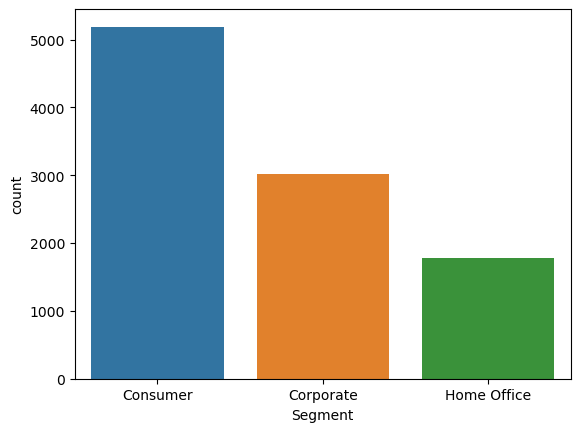

In [35]:
sns.countplot(x='Segment',data=df)
plt.show()

#### Observation - *Consumer Segment are the ones who buy most*

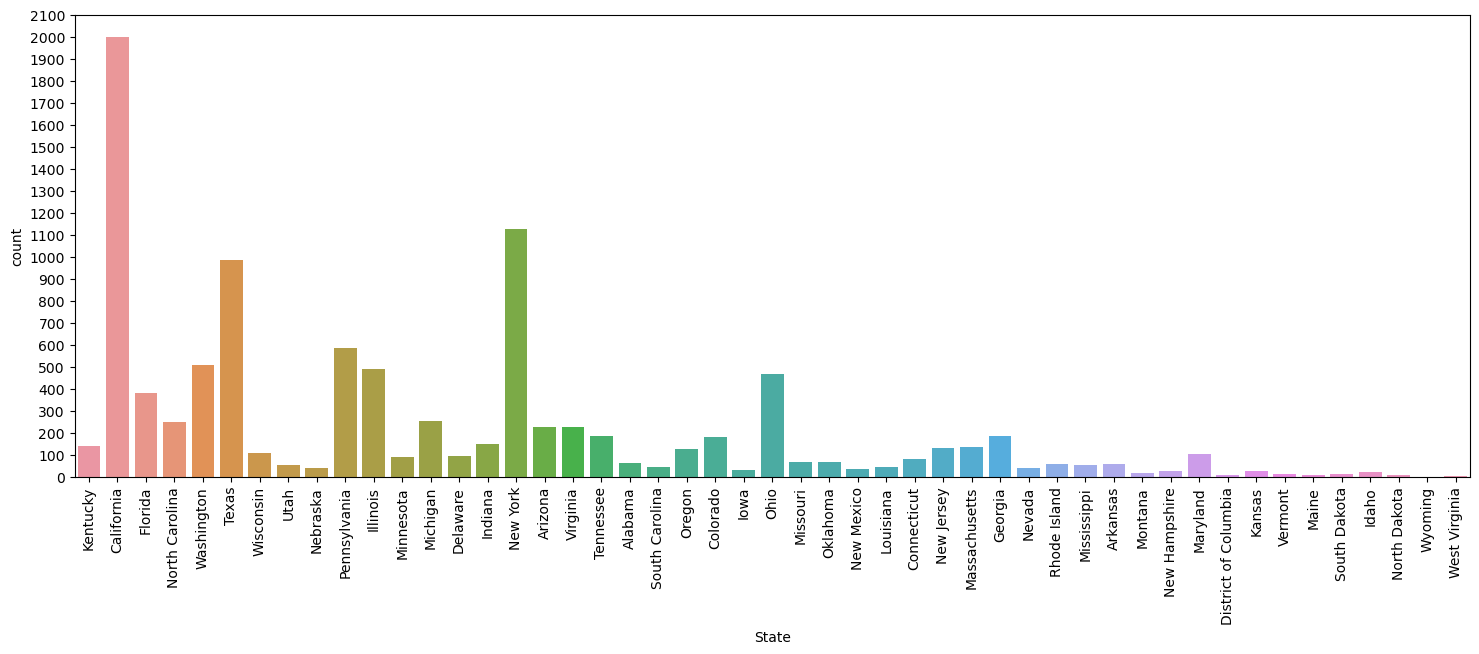

In [38]:
plt.figure(figsize=[18,6])
sns.countplot(x='State',data=df)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,100))
plt.show()

#### Observation - *California having the highest(2001) and Wyoming with least(1)*

In [40]:
df_state = df['State'].value_counts()

In [41]:
df_state

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

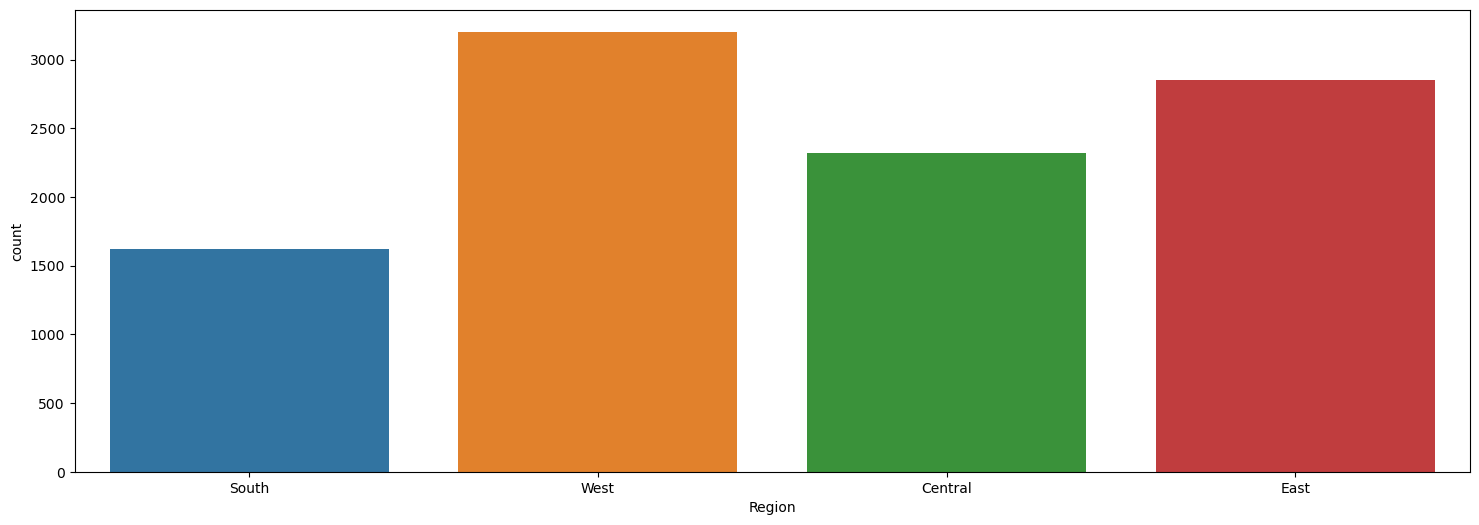

In [43]:
plt.figure(figsize=[18,6])
sns.countplot(x='Region',data=df)
plt.show()

#### Observation - *We can see that West Region having the highest count and South with least count*

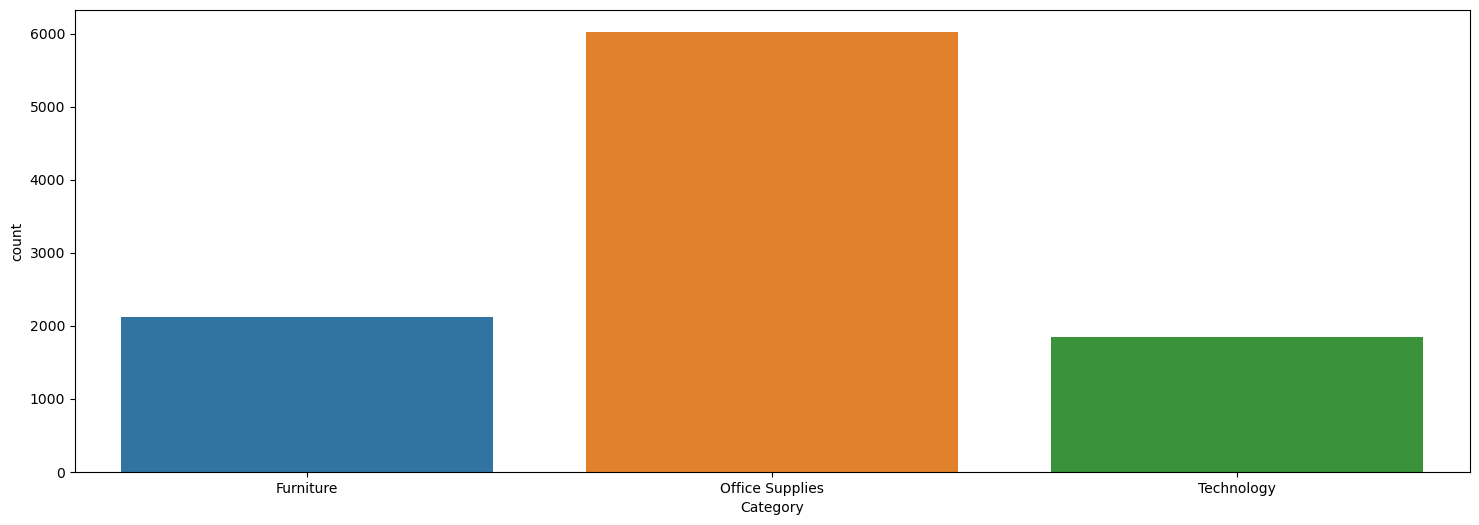

In [44]:
plt.figure(figsize=[18,6])
sns.countplot(x='Category',data=df)
plt.show()

#### Observation - *Office Supplies having the highest count and Technology with least count*

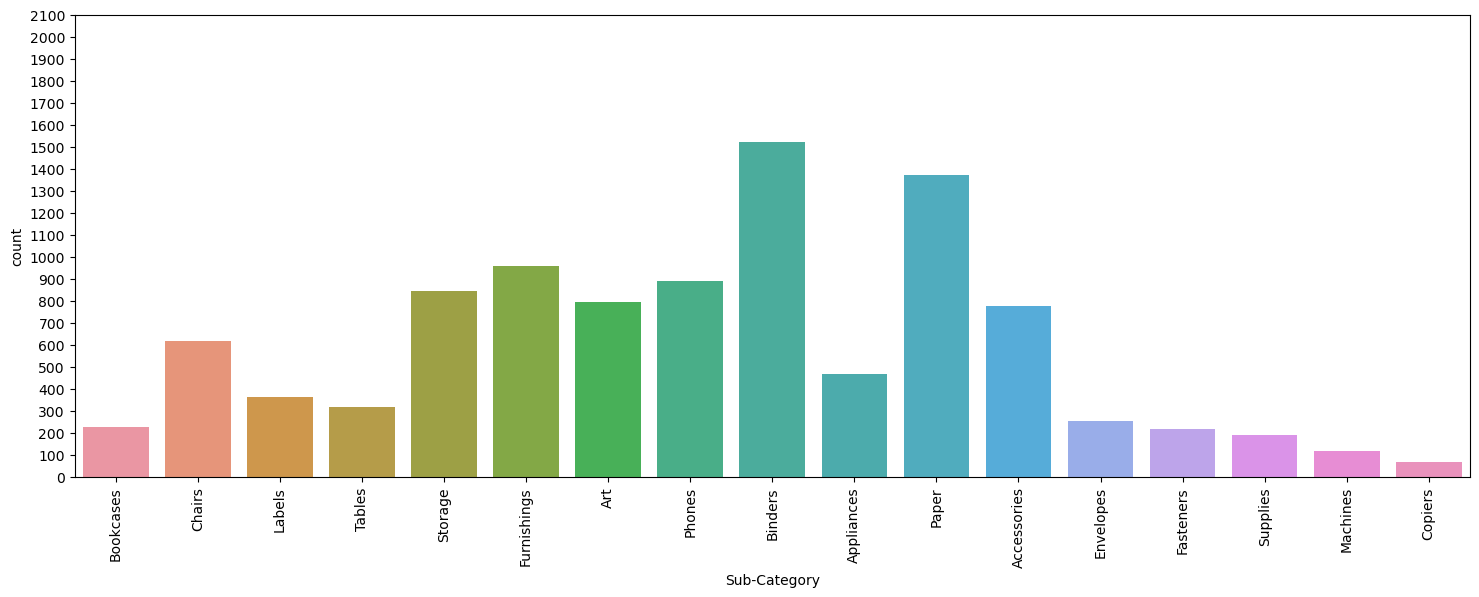

In [46]:
plt.figure(figsize=[18,6])
sns.countplot(x='Sub-Category',data=df)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,100))
plt.show()

#### Observation - *As we can see Blinders and Paper have highest count as compare to given Sub-categories*

In [21]:
cat_sub_top=cat_sub[:10]
cat_top=cat[:10]

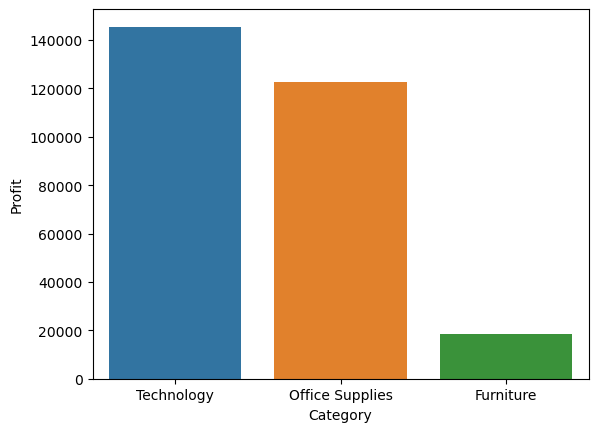

In [22]:
sns.barplot(data=cat_top,x='Category',y="Profit")
plt.show()

In [47]:
correlation = df.corr(method="pearson")

<AxesSubplot:>

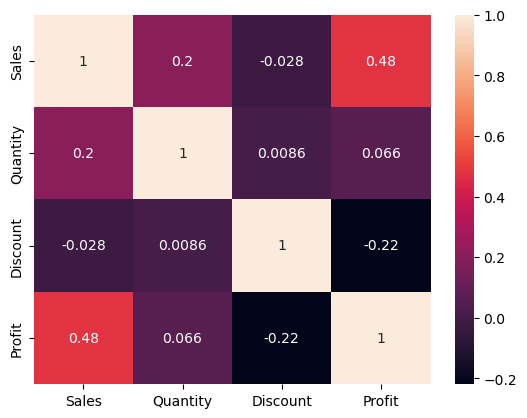

In [48]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

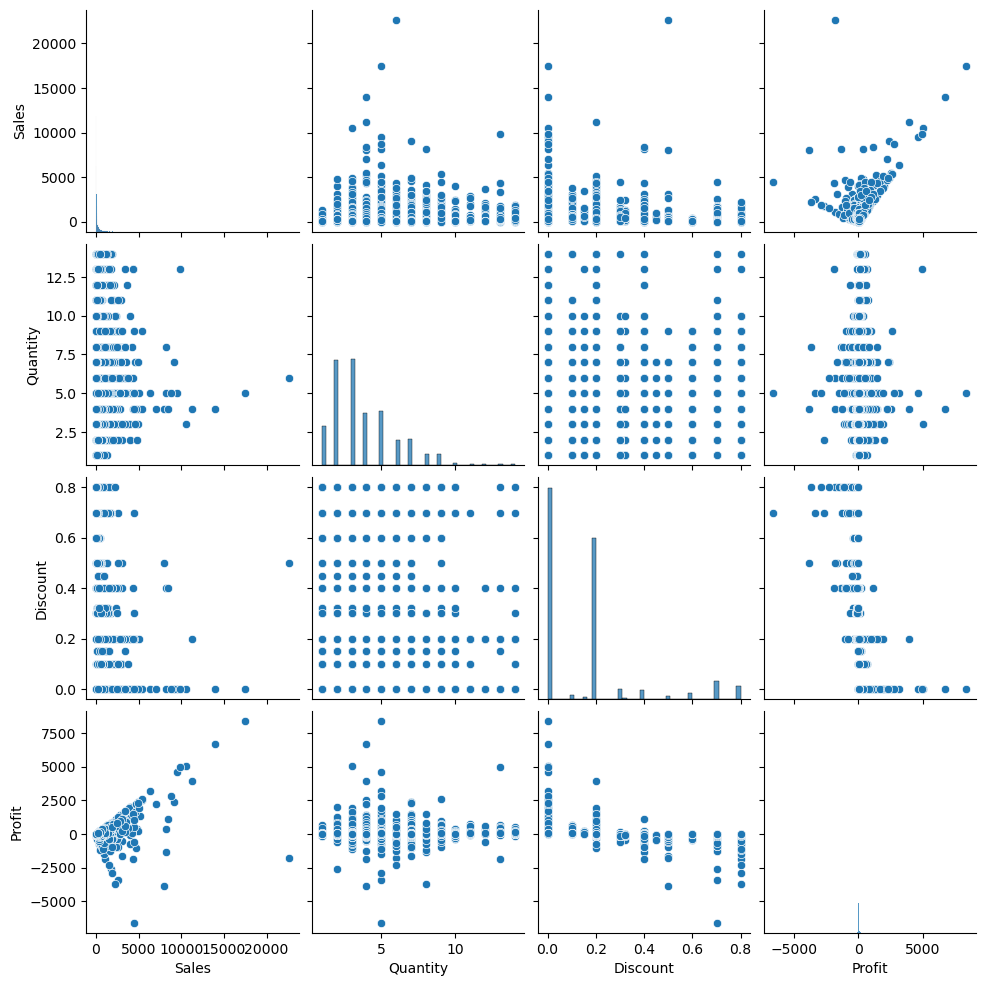

In [50]:
sns.pairplot(df)
plt.show()

In [53]:
# Analysis associated with Profit, Discount and Sales wrt Ship Mode -

df_ship = df.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
df_ship

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


In [54]:
# Analysis associated with Profit, Discount and Sales wrt Segments -

df_segm = df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_segm

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


In [55]:
# with respect to Region -

region = df['Region'].value_counts().sort_index()
region

Central    2323
East       2848
South      1620
West       3203
Name: Region, dtype: int64

In [56]:
# With respect to State
state = df['State'].value_counts()
print("Average Sales in a State",round(state.mean()))

Average Sales in a State 204


In [57]:
# With respect to Sub-category
df_subcategory = df['Sub-Category'].value_counts().sort_index()
df_subcategory

Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Sub-Category, dtype: int64

In [58]:
df_subcategory = df.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean().sort_values(by="Sales") 
df_subcategory

,Sales,Discount,Profit
Sub-Category,,,
Fasteners,13.936774,0.082028,4.375660
Art,34.068834,0.074874,8.200737
Labels,34.303055,0.068681,15.236962
Paper,57.284092,0.074891,24.856620
Envelopes,64.867724,0.080315,27.418019
Furnishings,95.825668,0.138349,13.645918
Binders,133.560560,0.372292,19.843574
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758


In [59]:
# With respect to Quantity
quant = df['Quantity'].value_counts().sort_values(ascending=False)
quant

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

#### We can Conclude that :
#### 1.Data contains 9994 records with 13 features and the dataset is about country USA.
#### 2.There are 17 duplicated values present.
#### 3.State with highest Sales and Profit is Vermont and gives 0 discount.
#### 4.Quantity is directly proportional to Profit, with max quantity as 13 sold, with max sales and profit Maybe indivualise and maximise profits for comparitively larger quantity of products which are been bought.
#### 5.Profit is inversely proportional to discount.
#### 6.Copiers subcategory has maximum sales.
#### 7.Technology Category has max profits.
#### 8.Consumer Segment has the most products being sold.